In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
W_true = 2
b_true = 0.5

In [3]:
x = np.linspace(0,3,130) #---generate x values

In [6]:
y = W_true * x + b_true + np.random.randn(*x.shape) # -- generate values with random element

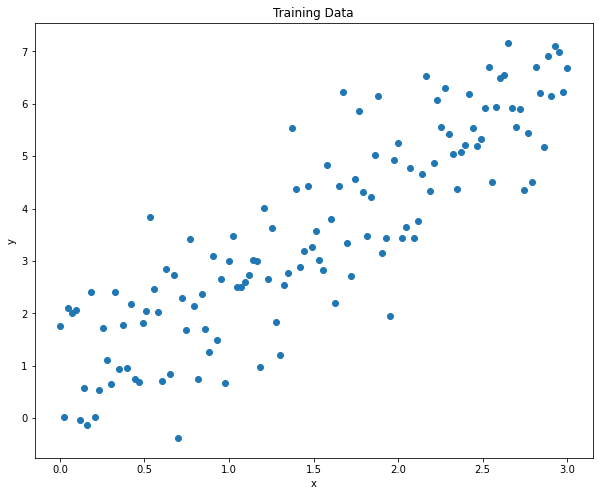

In [8]:
plt.figure(figsize = (10,8))
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()

In [10]:
class LinearModel:
    def __init__(self):
        self.weight = tf.Variable(np.random.randn(),name = "w")
        self.bias = tf.Variable(np.random.randn(),name = "b")
    def __call__(self,x):
        return self.weight*x+self.bias

In [15]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [20]:
def train(linear_model, x, y, lr = 0.01):
    with tf.GradientTape() as tape:
        #--- forward pass
        y_pred = linear_model(x)
        #--current loss
        current_loss = loss(y,y_pred)
    #---partial derivatives of loss wrt to parameters   
    d_weight, d_bias = tape.gradient(current_loss,[linear_model.weight,linear_model.bias])
    
    linear_model.weight.assign_sub(lr*d_weight)
    linear_model.bias.assign_sub(lr*d_bias)

In [28]:
linear_model = LinearModel()

weights, biases = [],[]

epochs = 100

lr = 0.15

In [29]:
for epoch_count in range(epochs):
    weights.append(linear_model.weight.numpy())
    biases.append(linear_model.bias.numpy())
    
    real_loss = loss(y, linear_model(x))
    
    train(linear_model, x, y, lr = lr)
    
    print(f'Epoch count {epoch_count}: Loss value: {real_loss.numpy()}')

Epoch count 0: Loss value: 11.300053596496582
Epoch count 1: Loss value: 1.2889065742492676
Epoch count 2: Loss value: 1.0638234615325928
Epoch count 3: Loss value: 1.04257333278656
Epoch count 4: Loss value: 1.02745521068573
Epoch count 5: Loss value: 1.01417076587677
Epoch count 6: Loss value: 1.0024324655532837
Epoch count 7: Loss value: 0.9920593500137329
Epoch count 8: Loss value: 0.9828926920890808
Epoch count 9: Loss value: 0.9747918844223022
Epoch count 10: Loss value: 0.9676331281661987
Epoch count 11: Loss value: 0.9613069295883179
Epoch count 12: Loss value: 0.9557164311408997
Epoch count 13: Loss value: 0.9507761001586914
Epoch count 14: Loss value: 0.9464101195335388
Epoch count 15: Loss value: 0.9425519704818726
Epoch count 16: Loss value: 0.9391424655914307
Epoch count 17: Loss value: 0.9361295104026794
Epoch count 18: Loss value: 0.933466911315918
Epoch count 19: Loss value: 0.9311138391494751
Epoch count 20: Loss value: 0.9290345907211304
Epoch count 21: Loss value: 0.

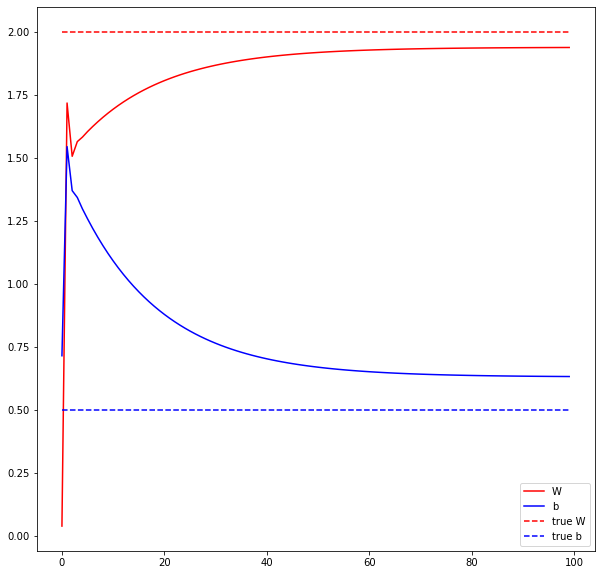

In [30]:
plt.figure(figsize = (10,10))
plt.plot(range(epochs), weights, 'r', range(epochs),biases, 'b')
plt.plot([W_true]*epochs, 'r--',[b_true]*epochs,'b--')
plt.legend(['W','b','true W','true b'])
plt.show()

In [31]:
linear_model.weight.numpy(),linear_model.bias.numpy()

(1.9382895, 0.6332746)

In [32]:
rmse = loss(y, linear_model(x))
rmse.numpy()

0.9132341

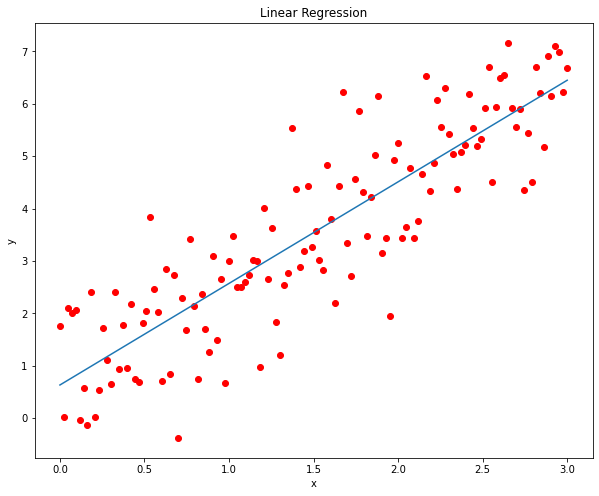

In [33]:
plt.figure(figsize = (10,8))
plt.plot(x,y,'ro',label = 'Original Data')
plt.plot(x, linear_model(x), label = 'Fitted line')

plt.xlabel('x')
plt.ylabel('y')
plt.title("Linear Regression")
plt.show()